In [1]:
# pip install geopandas


In [2]:
# pip install pyproj

In [3]:
# pip install rtree

In [4]:
# pip install statsmodels

In [5]:
# pip install libomp

In [6]:
# pip install tabulate

In [7]:
# pip install fpdf

In [8]:
# pip install streamlit

In [9]:
# pip install matplotlib

In [10]:
# pip install scikit-learn

In [11]:
# pip install ipywidgets

In [12]:
# pip install pandas_summary

In [13]:
import pandas as pd
from tabulate import tabulate
from fpdf import FPDF
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer

# This code uses GeoPandas to read a shapefile containing Boston neighborhood boundaries and creates a plot where each neighborhood is colored based on its name. This visualization helps in understanding the geographical distribution of neighborhoods in Boston, facilitating property grouping based on their location in whichever neighborhood.

<Axes: >

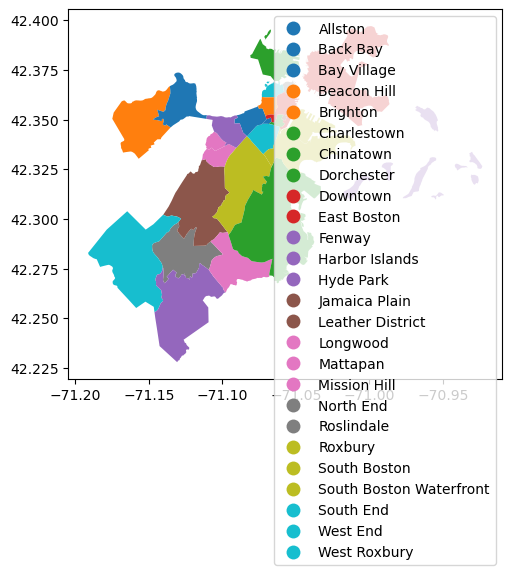

In [14]:
neighborhoods = gpd.read_file("Boston_Neighborhoods.shp")
neighborhoods.plot(column='Name', cmap=None, legend=True)

# 'prop23' datset provides a comprehensive and detailed overview of individual parcels in Boston. The information on property values, land use, building characteristics, and ownership details enables analysts to study trends in property assessments, identify patterns in land use, and assess the impact of factors like the year built and remodeling on property values. Additionally, details about heating systems, amenities, and parking spaces contribute valuable insights into the residential features of the properties, facilitating a thorough analysis of Boston's real estate landscape and aiding in informed decision-making for various stakeholders, including policymakers, researchers, and real estate professionals.

In [15]:
prop23 = pd.read_csv("fy2023-property-assessment-data.csv")
display(prop23.shape)
prop23.info()
prop23

(180627, 60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 180627 non-null  int64  
 1   CM_ID               91160 non-null   float64
 2   GIS_ID              180627 non-null  int64  
 3   ST_NUM              171096 non-null  float64
 4   ST_NAME             180627 non-null  object 
 5   UNIT_NUM            80672 non-null   object 
 6   CITY                180622 non-null  object 
 7   ZIP_CODE            180624 non-null  float64
 8   BLDG_SEQ            180626 non-null  float64
 9   NUM_BLDGS           180627 non-null  int64  
 10  LUC                 180627 non-null  int64  
 11  LU                  180627 non-null  object 
 12  LU_DESC             180627 non-null  object 
 13  BLDG_TYPE           178101 non-null  object 
 14  OWN_OCC             180627 non-null  object 
 15  OWNER               180627 non-nul

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180622,2205666000,NaN,2205666000,NaN,KNOWLES ST,NaN,BRIGHTON,2135.00,1.00,1,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
180623,2205667000,NaN,2205667000,NaN,Lake ST,NaN,BRIGHTON,2135.00,1.00,1,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
180624,2205668000,NaN,2205668000,4.00,Lake ST,NaN,BRIGHTON,2135.00,1.00,1,...,M - Modern,M - Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,2.00,A - Average,NaN
180625,2205669000,NaN,2205669000,2193.00,COMMONWEALTH AV,NaN,BRIGHTON,2135.00,1.00,1,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [16]:
# Calculate missing values for 'prop23'
prop23_missing_values = prop23.isna().sum()

# Calculate the total count for 'prop23'
prop23_total_count = prop23.shape[0]

# Calculate the percentage of missing values for each column in 'prop23'
prop23_percentage_missing = (prop23_missing_values / prop23_total_count) * 100

# Create a DataFrame to display the results
prop23_missing_info = pd.DataFrame({
    'Column': prop23.columns,
    'Missing Values': prop23_missing_values,
    'Total Count': prop23_total_count,
    'Percentage Missing': prop23_percentage_missing
})

# Display the missing values information for 'prop23'
prop23_missing_info

,Column,Missing Values,Total Count,Percentage Missing
PID,PID,0,180627,0.00
CM_ID,CM_ID,89467,180627,49.53
GIS_ID,GIS_ID,0,180627,0.00
ST_NUM,ST_NUM,9531,180627,5.28
ST_NAME,ST_NAME,0,180627,0.00
UNIT_NUM,UNIT_NUM,99955,180627,55.34
CITY,CITY,5,180627,0.00
ZIP_CODE,ZIP_CODE,3,180627,0.00
BLDG_SEQ,BLDG_SEQ,1,180627,0.00
NUM_BLDGS,NUM_BLDGS,0,180627,0.00


In [17]:
# Set the threshold for missing values
threshold = 20

# Calculate missing values for 'prop23'
prop23_missing_values = prop23.isna().sum()

# Calculate the total count for 'prop23'
prop23_total_count = prop23.shape[0]

# Calculate the percentage of missing values for each column in 'prop23'
prop23_percentage_missing = (prop23_missing_values / prop23_total_count) * 100

# Identify columns with more than 30% missing values
columns_to_drop = prop23_percentage_missing[prop23_percentage_missing > threshold].index

# Drop columns with more than 30% missing values from 'prop23'
prop23 = prop23.drop(columns=columns_to_drop)

# Display the filtered 'prop23' DataFrame
prop23

,PID,GIS_ID,ST_NUM,ST_NAME,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,...,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FNISHED,OVERALL_COND,FULL_BTH,HLF_BTH,KITCHENS,FIREPLACES
0,100001000,100001000,104.00,PUTNAM ST,EAST BOSTON,2128.00,1.00,1,105,R3,...,588500,784200,8422.31,1900.00,A - Asbestos,A - Average,3.00,0.00,3.00,0.00
1,100002000,100002000,197.00,Lexington ST,EAST BOSTON,2128.00,1.00,1,105,R3,...,615300,811800,8718.73,1920.00,M - Vinyl,A - Average,3.00,0.00,3.00,0.00
2,100003000,100003000,199.00,Lexington ST,EAST BOSTON,2128.00,1.00,1,105,R3,...,599200,796300,8552.26,1905.00,M - Vinyl,A - Average,3.00,0.00,3.00,0.00
3,100004000,100004000,201.00,Lexington ST,EAST BOSTON,2128.00,1.00,1,105,R3,...,530200,727900,7817.65,1900.00,M - Vinyl,A - Average,3.00,0.00,3.00,0.00
4,100005000,100005000,203.00,Lexington ST,EAST BOSTON,2128.00,1.00,1,104,R2,...,569100,794800,8536.15,1900.00,M - Vinyl,A - Average,3.00,0.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180622,2205666000,2205666000,NaN,KNOWLES ST,BRIGHTON,2135.00,1.00,1,902,E,...,0,240500,0.00,NaN,NaN,A - Average,0.00,0.00,0.00,0.00
180623,2205667000,2205667000,NaN,Lake ST,BRIGHTON,2135.00,1.00,1,132,RL - RL,...,0,71400,766.84,NaN,NaN,A - Average,0.00,0.00,0.00,0.00
180624,2205668000,2205668000,4.00,Lake ST,BRIGHTON,2135.00,1.00,1,105,R3,...,850500,1314900,14122.03,1920.00,M - Vinyl,G - Good,3.00,0.00,3.00,0.00
180625,2205669000,2205669000,2193.00,COMMONWEALTH AV,BRIGHTON,2135.00,1.00,1,319,C,...,1478400,2478800,61176.78,1947.00,01 - Brick,G - Good,0.00,0.00,0.00,0.00


In [18]:
# Calculate missing values for 'prop23'
prop23_missing_values = prop23.isna().sum()

# Calculate the total count for 'prop23'
prop23_total_count = prop23.shape[0]

# Calculate the percentage of missing values for each column in 'prop23'
prop23_percentage_missing = (prop23_missing_values / prop23_total_count) * 100

# Create a DataFrame to display the results
prop23_missing_info = pd.DataFrame({
    'Column': prop23.columns,
    'Missing Values': prop23_missing_values,
    'Total Count': prop23_total_count,
    'Percentage Missing': prop23_percentage_missing
})

# Display the missing values information for 'prop23'
prop23_missing_info

,Column,Missing Values,Total Count,Percentage Missing
PID,PID,0,180627,0.00
GIS_ID,GIS_ID,0,180627,0.00
ST_NUM,ST_NUM,9531,180627,5.28
ST_NAME,ST_NAME,0,180627,0.00
CITY,CITY,5,180627,0.00
ZIP_CODE,ZIP_CODE,3,180627,0.00
BLDG_SEQ,BLDG_SEQ,1,180627,0.00
NUM_BLDGS,NUM_BLDGS,0,180627,0.00
LUC,LUC,0,180627,0.00
LU,LU,0,180627,0.00


# The dataset 'padl' contains detailed information about properties in the City of Boston from 2001 to 2021. It includes data such as PID, street details, zip codes, assessed values, land use types, and geographical coordinates (lat and long). The dataset is structured with identifying characteristics, property and building characteristics, and geographical information. The variables cover aspects like property ownership, valuation changes over time, and geographical details.

In [19]:
padl = pd.read_csv("PAD.Long.2021.csv")
display(padl.shape)
padl.info()
columns_to_drop = ['ST_NUM', 'FY2001.LU', 'FY2001.RESEX', 'LU2001FourCat', 'FY2002.LU', 'FY2002.RESEX', 'LU2002FourCat', 'FY2003.LU', 'FY2003.RESEX', 'LU2003FourCat', 'FY2004.LU', 'FY2004.RESEX', 'LU2004FourCat', 'FY2005.LU', 'FY2005.RESEX', 'LU2005FourCat', 'FY2006.LU', 'FY2006.RESEX', 'LU2006FourCat', 'FY2007.LU', 'FY2007.RESEX', 'LU2007FourCat', 'FY2008.LU', 'FY2008.RESEX', 'LU2008FourCat', 'FY2009.LU', 'FY2009.RESEX', 'LU2009FourCat', 'FY2010.LU', 'FY2010.RESEX', 'LU2010FourCat', 'FY2011.LU', 'FY2011.RESEX', 'LU2011FourCat', 'FY2012.LU', 'FY2012.RESEX', 'LU2012FourCat', 'FY2013.LU', 'FY2013.RESEX', 'LU2013FourCat', 'FY2014.LU', 'FY2014.RESEX', 'LU2014FourCat', 'FY2015.LU', 'FY2015.RESEX', 'LU2015FourCat', 'FY2016.LU', 'FY2016.RESEX', 'LU2016FourCat', 'FY2017.LU', 'FY2017.RESEX', 'LU2017FourCat', 'FY2018.LU', 'FY2018.RESEX', 'LU2018FourCat', 'FY2019.LU', 'FY2019.RESEX', 'LU2019FourCat', 'FY2020.LU', 'FY2020.RESEX', 'LU2020FourCat', 'FY2021.LU', 'FY2021.RESEX', 'LU2021FourCat']
padl = padl.drop(columns=columns_to_drop)
padl

(179392, 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179392 entries, 0 to 179391
Columns: 150 entries, PID to CT_ID_10
dtypes: float64(79), int64(2), object(69)
memory usage: 205.3+ MB


,PID,CM_ID,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,FY2001.AV,...,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,GIS_ID,Land_Parcel_ID,TLID,Blk_ID_10,BG_ID_10,CT_ID_10
0,1000000000,NaN,ST,ST,2130.00,R3,138300.00,Y,Res,193100.00,...,NaN,NaN,-71.11,42.32,1002000000,1002000000.00,85699076.00,250251207002002.00,250251207002.00,25025120700.00
1,1000001005,NaN,SMITH ST,ST,2120.00,E,545000.00,N,Exem,382600.00,...,4868000.00,1.26,-71.10,42.33,1000001005,1000001005.00,640494552.00,250250808012003.00,250250808012.00,25025080801.00
2,1000001015,NaN,SMITH ST,ST,2120.00,E,520500.00,N,Exem,622000.00,...,513200.00,0.44,-71.10,42.33,1000001015,1000001015.00,640494548.00,250250808012002.00,250250808012.00,25025080801.00
3,1000001020,NaN,ST ALPHONSUS ST,ST,2120.00,E,776500.00,N,Exem,868800.00,...,7439000.00,0.79,-71.10,42.34,1000001020,1000001020.00,85698841.00,250250808012001.00,250250808012.00,25025080801.00
4,1000001021,NaN,ST ALPHONSUS ST,ST,2120.00,NaN,NaN,NaN,NaN,NaN,...,200.00,0.40,-71.10,42.34,1000001021,1000001020.00,85698841.00,250250808012001.00,250250808012.00,25025080801.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.07,42.34,105937000,105937000.00,NaN,250250606001001.00,250250606001.00,25025060600.00
179388,1400193002,NaN,NaN,AV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.06,42.36,304850000,304850000.00,85730539.00,250250612001056.00,250250612001.00,25025061200.00
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.03,42.34,600620000,600620000.00,85713282.00,250250911002000.00,250250911002.00,25025091100.00
179390,500815229,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.04,42.33,1812152050,1812152010.00,637177254.00,250250701014000.00,250250701014.00,25025070101.00


In [20]:
missing_values = padl.isna().sum()

inverted_missing_values = missing_values.to_frame().T
inverted_missing_values.reset_index(drop=True, inplace=True)

counts = padl.count()
transposed_counts = counts.to_frame().T

percentage_missing_values = (inverted_missing_values.iloc[0] / transposed_counts.iloc[0]) * 100

# percentage of missing values
inverted_missing_values.loc[1] = percentage_missing_values
inverted_missing_values

,PID,CM_ID,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,FY2001.AV,...,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,GIS_ID,Land_Parcel_ID,TLID,Blk_ID_10,BG_ID_10,CT_ID_10
0,0.00,68175.00,115.00,4954.00,96.00,45414.00,48979.00,45436.00,45417.00,48003.00,...,29592.00,29592.00,3.00,3.00,0.00,3.00,5.00,3.00,3.00,3.00
1,0.00,61.30,0.06,2.84,0.05,33.90,37.56,33.92,33.90,36.54,...,19.75,19.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
threshold = 40
# Calculate missing values for 'padl'
padl_missing_values = padl.isna().sum()

# Calculate the total count for 'padl'
padl_total_count = padl.shape[0]

# Calculate the percentage of missing values for each column in 'padl'
padl_percentage_missing = (padl_missing_values / padl_total_count) * 100

# Create a DataFrame to display the results
padl_missing_info = pd.DataFrame({
    'Column': padl.columns,
    'Missing Values': padl_missing_values,
    'Total Count': padl_total_count,
    'Percentage Missing': padl_percentage_missing
})

# Identify columns with more than 30% missing values
columns_to_drop_padl = padl_percentage_missing[padl_percentage_missing > threshold].index

# Drop columns with more than 30% missing values from 'padl'
padl = padl.drop(columns=columns_to_drop_padl)
# Display the missing values information for 'padl'
padl


,PID,CM_ID,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,FY2001.AV,...,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,GIS_ID,Land_Parcel_ID,TLID,Blk_ID_10,BG_ID_10,CT_ID_10
0,1000000000,NaN,ST,ST,2130.00,R3,138300.00,Y,Res,193100.00,...,NaN,NaN,-71.11,42.32,1002000000,1002000000.00,85699076.00,250251207002002.00,250251207002.00,25025120700.00
1,1000001005,NaN,SMITH ST,ST,2120.00,E,545000.00,N,Exem,382600.00,...,4868000.00,1.26,-71.10,42.33,1000001005,1000001005.00,640494552.00,250250808012003.00,250250808012.00,25025080801.00
2,1000001015,NaN,SMITH ST,ST,2120.00,E,520500.00,N,Exem,622000.00,...,513200.00,0.44,-71.10,42.33,1000001015,1000001015.00,640494548.00,250250808012002.00,250250808012.00,25025080801.00
3,1000001020,NaN,ST ALPHONSUS ST,ST,2120.00,E,776500.00,N,Exem,868800.00,...,7439000.00,0.79,-71.10,42.34,1000001020,1000001020.00,85698841.00,250250808012001.00,250250808012.00,25025080801.00
4,1000001021,NaN,ST ALPHONSUS ST,ST,2120.00,NaN,NaN,NaN,NaN,NaN,...,200.00,0.40,-71.10,42.34,1000001021,1000001020.00,85698841.00,250250808012001.00,250250808012.00,25025080801.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179387,1200354020,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.07,42.34,105937000,105937000.00,NaN,250250606001001.00,250250606001.00,25025060600.00
179388,1400193002,NaN,NaN,AV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.06,42.36,304850000,304850000.00,85730539.00,250250612001056.00,250250612001.00,25025061200.00
179389,401461020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.03,42.34,600620000,600620000.00,85713282.00,250250911002000.00,250250911002.00,25025091100.00
179390,500815229,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-71.04,42.33,1812152050,1812152010.00,637177254.00,250250701014000.00,250250701014.00,25025070101.00


In [22]:
missing_values = padl.isna().sum()

inverted_missing_values = missing_values.to_frame().T
inverted_missing_values.reset_index(drop=True, inplace=True)

counts = padl.count()
transposed_counts = counts.to_frame().T

percentage_missing_values = (inverted_missing_values.iloc[0] / transposed_counts.iloc[0]) * 100

# percentage of missing values
inverted_missing_values.loc[1] = percentage_missing_values
inverted_missing_values

,PID,CM_ID,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,FY2001.AV,...,RecoveryDiffAV,RecoveryPercChangeAV,X,Y,GIS_ID,Land_Parcel_ID,TLID,Blk_ID_10,BG_ID_10,CT_ID_10
0,0.00,68175.00,115.00,4954.00,96.00,45414.00,48979.00,45436.00,45417.00,48003.00,...,29592.00,29592.00,3.00,3.00,0.00,3.00,5.00,3.00,3.00,3.00
1,0.00,61.30,0.06,2.84,0.05,33.90,37.56,33.92,33.90,36.54,...,19.75,19.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [23]:
# https://data.boston.gov/dataset/vision-zero-fatality-records

In [24]:
# https://bluebikes.com/system-data

In [25]:
# https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

# This code is counting how many times each unique property identification number (PID) appears in the dataset. It then filters and identifies PIDs that occur more than once, prints those repeated PIDs along with their counts. This helps to identify any duplicates in the property data.

In [26]:
pid_counts1 = prop23['PID'].value_counts()

# Filter for values that are repeated more than once
repeated_pids1 = pid_counts1[pid_counts1 > 1]

# Print the total number of unique PIDs
print("\nTotal number of unique PIDs:", len(pid_counts1))


Total number of unique PIDs: 180448


In [27]:
prop23 = prop23.drop_duplicates(subset='PID', keep='first')

print("Shape of DataFrame with unique PIDs:", prop23.shape)

Shape of DataFrame with unique PIDs: (180448, 30)


In [28]:
pid_counts2 = padl['PID'].value_counts()

# Filter for values that are repeated more than once
repeated_pids2 = pid_counts2[pid_counts2 > 1]

# Print the total number of unique PIDs
print("\nTotal number of unique PIDs:", len(pid_counts2))


Total number of unique PIDs: 179353


In [29]:
padl = padl.drop_duplicates(subset='PID', keep='first')

print("Shape of DataFrame with unique PIDs:", padl.shape)

Shape of DataFrame with unique PIDs: (179353, 86)


# Merging both datasets

In [30]:

# Assuming prop23 is your second DataFrame
padl = pd.merge(padl, prop23[['PID', 'GIS_ID', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE', 'RES_FLOOR', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'EXT_FNISHED', 'OVERALL_COND', 'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'FIREPLACES']], on='PID', how='left', suffixes=('_left', '_right'))

# Remove '_left' and '_right' suffixes from column names
padl.columns = padl.columns.str.replace('_left', '').str.replace('_right', '')

# Display the updated DataFrame
padl


,PID,CM_ID,ST_NAME,ST_NAME_SUF,ZIPCODE,FY2000.LU,FY2000.AV,FY2000.RESEX,LU2000FourCat,FY2001.AV,...,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,EXT_FNISHED,OVERALL_COND,FULL_BTH,HLF_BTH,KITCHENS,FIREPLACES
0,1000000000,NaN,ST,ST,2130.00,R3,138300.00,Y,Res,193100.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001005,NaN,SMITH ST,ST,2120.00,E,545000.00,N,Exem,382600.00,...,13790100.00,18478200.00,0.00,2001.00,09 - Wood Siding,A - Average,0.00,0.00,0.00,0.00
2,1000001015,NaN,SMITH ST,ST,2120.00,E,520500.00,N,Exem,622000.00,...,200.00,2104800.00,0.00,NaN,NaN,A - Average,0.00,0.00,0.00,0.00
3,1000001020,NaN,ST ALPHONSUS ST,ST,2120.00,E,776500.00,N,Exem,868800.00,...,833374.00,3107519.00,0.00,2001.00,09 - Wood Siding,A - Average,0.00,0.00,0.00,0.00
4,1000001021,NaN,ST ALPHONSUS ST,ST,2120.00,NaN,NaN,NaN,NaN,NaN,...,200.00,200.00,0.00,NaN,NaN,A - Average,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179348,1200354020,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179349,1400193002,NaN,NaN,AV,NaN,NaN,NaN,NaN,NaN,NaN,...,430500.00,430500.00,4623.57,1899.00,B - Brick/Stone,A - Average,2.00,0.00,1.00,0.00
179350,401461020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179351,500815229,NaN,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Calculate missing values for 'prop23'
padl_missing_values = padl.isna().sum()

# Calculate the total count for 'prop23'
padl_total_count = padl.shape[0]

# Calculate the percentage of missing values for each column in 'prop23'
padl_percentage_missing = (padl_missing_values / padl_total_count) * 100

# Create a DataFrame to display the results
padl_missing_info = pd.DataFrame({
    'Column': padl.columns,
    'Missing Values': padl_missing_values,
    'Total Count': padl_total_count,
    'Percentage Missing': padl_percentage_missing
})

# Display the missing values information for 'prop23'
padl_missing_info
# Assuming 'padl_missing_info' is your DataFrame


,Column,Missing Values,Total Count,Percentage Missing
PID,PID,0,179353,0.00
CM_ID,CM_ID,68151,179353,38.00
ST_NAME,ST_NAME,113,179353,0.06
ST_NAME_SUF,ST_NAME_SUF,4954,179353,2.76
ZIPCODE,ZIPCODE,96,179353,0.05
...,...,...,...,...
OVERALL_COND,OVERALL_COND,12275,179353,6.84
FULL_BTH,FULL_BTH,13978,179353,7.79
HLF_BTH,HLF_BTH,13832,179353,7.71
KITCHENS,KITCHENS,13977,179353,7.79


from sklearn.preprocessing import LabelEncoder
# Assuming your DataFrame is named padl
padl_cleaned = padl.loc[:, ~padl.columns.duplicated()]
padl_sample = padl_cleaned.sample(frac=0.1, random_state=42)

# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
padl_encoded = padl_sample.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

target_column = 'RES_FLOOR'

# Handle NaN values in the target variable
padl_encoded = padl_encoded.dropna(subset=[target_column])

# Separate data into features (X) and target variable (y)
X = padl_encoded.drop(columns=[target_column, 'PID', 'X', 'Y'])
y = padl_encoded[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display the models and their performance
print(models)
print(predictions)

In [32]:
def impute_missing_values(df, target_column):
    # Select columns including 'PID', 'X', 'Y', 'ZIPCODE', and target_column
    selected_columns = ['X', 'Y', 'ZIPCODE', target_column]

    # Separate features and target variable using only numerical columns
    X_train = df[selected_columns].select_dtypes(include=['number'])
    y_train = df[target_column]
    X_test = df[df[target_column].isnull()]

    # Check if X_test has at least one sample
    if not X_test.empty:
        # Impute missing values using SimpleImputer for X_train
        imputer_X = SimpleImputer(strategy='mean')
        X_train_imputed = imputer_X.fit_transform(X_train)

        # Impute missing values using SimpleImputer for y_train
        imputer_y = SimpleImputer(strategy='mean')
        y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1))

        # Fit ExtraTreesRegressor on imputed data
        imputer_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
        imputer_model.fit(X_train_imputed, y_train_imputed.ravel())

        # Predict missing values
        X_test_imputed = imputer_X.transform(X_test[selected_columns].select_dtypes(include=['number']))
        imputed_values = imputer_model.predict(X_test_imputed)

        # Fill in the missing values in the original DataFrame
        df.loc[X_test.index, target_column] = imputed_values

    else:
        print("X_test has no samples. No imputation performed.")



In [33]:
impute_missing_values(padl, 'FY2000.AV')

In [34]:
impute_missing_values(padl, 'FY2021.AV')

In [35]:
impute_missing_values(padl, 'PercChangeAV2021')

In [36]:
impute_missing_values(padl, 'GrowthPercChangeAV')

In [37]:
impute_missing_values(padl, 'CrashPercChangeAV')

In [38]:
impute_missing_values(padl, 'RecoveryPercChangeAV')

In [39]:
impute_missing_values(padl, 'RecoveryDiffAV')

In [40]:
impute_missing_values(padl, 'NUM_BLDGS')

In [41]:
impute_missing_values(padl, 'LAND_SF')

In [42]:
impute_missing_values(padl, 'LAND_VALUE')

In [43]:
impute_missing_values(padl, 'RES_FLOOR')

In [44]:
impute_missing_values(padl, 'GROSS_AREA')

In [45]:
impute_missing_values(padl, 'LIVING_AREA')

In [46]:
impute_missing_values(padl, 'YR_BUILT')

In [47]:
impute_missing_values(padl, 'BLDG_VALUE')

In [48]:
impute_missing_values(padl, 'TOTAL_VALUE')

In [49]:
impute_missing_values(padl, 'GROSS_TAX')

In [50]:
columns = [
    'FY2000.AV','FY2021.AV', 'PercChangeAV2021', 'GrowthPercChangeAV', 'CrashPercChangeAV',
    'RecoveryPercChangeAV', 'RecoveryDiffAV', 'NUM_BLDGS', 'LAND_SF',
    'LAND_VALUE', 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA',
    'YR_BUILT', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX',
]
missing_percentage_additional = padl[columns].isnull().mean() * 100

# Display missing value percentages for additional columns
print("Missing Value Percentages for Additional Columns:")
print(missing_percentage_additional)

Missing Value Percentages for Additional Columns:
FY2000.AV              0.00
FY2021.AV              0.00
PercChangeAV2021       0.00
GrowthPercChangeAV     0.00
CrashPercChangeAV      0.00
RecoveryPercChangeAV   0.00
RecoveryDiffAV         0.00
NUM_BLDGS              0.00
LAND_SF                0.00
LAND_VALUE             0.00
RES_FLOOR              0.00
GROSS_AREA             0.00
LIVING_AREA            0.00
YR_BUILT               0.00
BLDG_VALUE             0.00
TOTAL_VALUE            0.00
GROSS_TAX              0.00
dtype: float64


In [51]:
inv = pd.read_csv("building_inventory_021020.csv")
inv

,id,pid_long,cm_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,94001,2200577000,NaN,Convention/Assembly,"Convention/Assembly, 1950-1979",Public & Quasi-Public,"< 25,000 sqft",1950-1979,525,WESTERN,...,f,f,f,f,f,f,f,f,f,0
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98925,66236,1001363000,1001363000.00,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
98926,68980,2007422000,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,19,AVALON,...,f,f,f,f,f,f,f,f,f,0
98927,95554,2203167050,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,46,GERRISH,...,f,f,f,f,f,f,f,f,f,0
98928,58753,200894010,200894010.00,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [52]:
ubill = pd.read_csv("Utility Bills.csv")
ubill['Zipcode'] = pd.to_numeric(ubill['Zip'].str.extract('(\d+)', expand=False), errors='coerce')
ubill

,InvoiceID,AccountNumber,EnergyTypeName,InvoiceDate,FromDate,ToDate,UsagePeriodDays,DeliveryCost,SupplyCost,TotalCost,...,City,Zip,StateName,Abbreviation,CountryName,SiteName,Currency,CodeDescription,DepartmentName,Zipcode
0,6590186,9504656628,Steam,2014-12-01,2014-10-30,2014-12-01,32,2492.31,0.00,2492.31,...,Boston,02108,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,PMD,2108
1,6768422,27158900020,Electric,2014-08-18,2014-07-18,2014-08-18,31,109.86,105.01,214.87,...,Boston,02119,Massachusetts,MA,United States,Metered Streetlights,USD,Supply and Delivery Invoices,PWD,2119
2,6768423,26436161009,Electric,2015-09-21,2015-08-20,2015-09-21,32,34.14,35.21,69.35,...,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS,2124
3,6768424,26433161002,Electric,2015-04-08,2015-03-10,2015-04-08,29,8.02,10.21,18.23,...,Boston,02131,Massachusetts,MA,United States,Haley,USD,Supply and Delivery Invoices,BPS,2131
4,6768425,26436161009,Electric,2015-01-22,2014-12-22,2015-01-22,31,32.36,56.10,88.46,...,Boston,02124,Massachusetts,MA,United States,Lee,USD,Supply and Delivery Invoices,BPS,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659700,17974025,USX0042712,Electric,2023-08-10,2023-07-01,2023-07-31,30,3615.00,0.00,3615.00,...,Boston,02120,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,BPD,2120
659701,17974026,USX0042713,Electric,2023-08-10,2023-07-01,2023-07-31,30,1225.00,0.00,1225.00,...,Boston,02120,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,BCYF,2120
659702,17976596,26447371019,Electric,2023-08-10,2023-06-14,2023-07-13,29,1558.89,0.00,1558.89,...,Boston,02121,Massachusetts,MA,United States,William J. Devine Golf Course,USD,Supply Invoice,PARKS,2121
659703,17977121,29947650015,Electric,2023-08-10,2023-06-14,2023-07-12,28,41.23,0.00,41.23,...,Dorchester,02121,Massachusetts,MA,United States,Unknown,USD,Delivery Invoice,PWD,2121


In [53]:
# Remove rows with null values and zeros in the specified columns
ubill = ubill.dropna(subset=['Zip', 'TotalCost', 'TotalConsumption'])
ubill = ubill[(ubill['TotalCost'] != 0) & (ubill['TotalConsumption'] != 0)]
# Specify the columns to be kept
columns_to_keep = ["InvoiceID", "AccountNumber", "EnergyTypeName", "TotalCost", "TotalConsumption", "StreetAddress", "City", "Zip", "StateName", "Abbreviation", "CountryName", "SiteName", "Currency"]

# Hide all columns except the specified ones
ubill = ubill[columns_to_keep]
ubill

,InvoiceID,AccountNumber,EnergyTypeName,TotalCost,TotalConsumption,StreetAddress,City,Zip,StateName,Abbreviation,CountryName,SiteName,Currency
0,6590186,9504656628,Steam,2492.31,64.00,City Hall Plaza,Boston,02108,Massachusetts,MA,United States,Unknown,USD
1,6768422,27158900020,Electric,214.87,2061.00,Washington St. Op. 2671,Boston,02119,Massachusetts,MA,United States,Metered Streetlights,USD
2,6768423,26436161009,Electric,69.35,656.00,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD
4,6768425,26436161009,Electric,88.46,656.00,155 Talbot Ave,Boston,02124,Massachusetts,MA,United States,Lee,USD
7,6768428,26443161000,Electric,1785.82,20880.00,60 Glenmont Rd,Boston,02135,Massachusetts,MA,United States,Edison,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659697,17966112,16414960019,Natural Gas,66.57,31.00,35 Harvard Ave,Boston,02136,Massachusetts,MA,United States,Hyde Park Branch,USD
659698,17966113,28576050018,Natural Gas,129.26,97.00,1249 Hyde Park Ave,Boston,02120,Massachusetts,MA,United States,E-18 Station,USD
659699,17974024,USX0042711,Electric,206.00,2178.00,6 Cummins Hwy,Roslindale,02131,Massachusetts,MA,United States,Unknown,USD
659700,17974025,USX0042712,Electric,3615.00,37362.60,1 Schroeder Place,Boston,02120,Massachusetts,MA,United States,Unknown,USD


In [ ]:
padl['geometry'] = [Point(xy) for xy in zip(padl['X'], padl['Y'])]
padl_gdf = gpd.GeoDataFrame(padl, geometry='geometry')

# Create a new empty column 'neighborhood' after the 'ZIPCODE' column
padl['neighborhood'] = ""

# Function to determine if a property observation falls within a neighborhood
def assign_neighborhood(row):
    for idx, neighborhood in neighborhoods.iterrows():
        if row['geometry'].within(neighborhood['geometry']):
            return neighborhood['Name']
    return ""

# Apply the function to each row in 'padl' and update the 'neighborhood' column
padl['neighborhood'] = padl_gdf.apply(assign_neighborhood, axis=1)

# Drop the 'geometry' column if not needed anymore
padl.drop('geometry', axis=1, inplace=True)

In [ ]:
empty_neighborhood_count = (padl['neighborhood'] == '').sum()

# Display the result
print("Number of empty values in 'neighborhood' column:", empty_neighborhood_count)
padl

zipcode_ranges = padl.groupby('neighborhood')['ZIPCODE'].agg(['min', 'max']).reset_index()

# Step 2: Create a dictionary mapping zip code ranges to neighborhoods
zipcode_dict = {}
for _, row in zipcode_ranges.iterrows():
    neighborhood = row['neighborhood']
    zipcode_range = range(int(row['min']), int(row['max']) + 1)
    for zipcode in zipcode_range:
        zipcode_dict[zipcode] = neighborhood

# Step 3: Convert 'ZIPCODE' to numeric to handle non-finite values
padl['ZIPCODE'] = pd.to_numeric(padl['ZIPCODE'], errors='coerce')

# Step 4: Fill in blank (' ') neighborhood values based on zip code
blank_neighborhoods = padl['neighborhood'].str.strip() == ''
padl.loc[blank_neighborhoods, 'neighborhood'] = padl.loc[blank_neighborhoods, 'ZIPCODE'].map(zipcode_dict)

# Display the updated DataFrame
padl

In [ ]:
empty_neighborhood_count = (padl['neighborhood'] == '').sum()

# Display the result
print("Number of ' ' (empty string) values in 'neighborhood' column after imputation:", empty_neighborhood_count)
padl

In [ ]:
columns_to_keep = [
    "PID", "ZIPCODE", "FY2021.AV", "DiffAV2021", "PercChangeAV2021", "RecoveryDiffAV",
    "RecoveryPercChangeAV", 'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 
    'BLDG_VALUE', 'TOTAL_VALUE', 'FY2000.AV', 'PercChangeAV2021', 'GrowthPercChangeAV', 
    'CrashPercChangeAV', 'RecoveryPercChangeAV', 'NUM_BLDGS', 'LAND_SF', 'LAND_VALUE', 
    'RES_FLOOR', 'GROSS_AREA', 'LIVING_AREA', 'YR_BUILT', 'BLDG_VALUE', 'TOTAL_VALUE', 
    'GROSS_TAX', 'neighborhood'
]
# Group by 'neighborhood' and calculate averages or min-max ranges based on new column names
grouped_df = padl.groupby('neighborhood')[columns_to_keep].agg({
    'PID': ['min', 'max'],
    'ZIPCODE': ['min', 'max'],
    'FY2021.AV': 'mean',
    'DiffAV2021': 'mean',
    'PercChangeAV2021': 'mean',
    'RecoveryDiffAV': 'mean',
    'RecoveryPercChangeAV': 'mean',
    'GROSS_AREA': 'mean',
    'RES_FLOOR': 'mean',
    'LIVING_AREA': 'mean',
    'LAND_VALUE': 'mean',
    'BLDG_VALUE': 'mean',
    'TOTAL_VALUE': 'mean',
    'FY2000.AV': 'mean',  # Include the new columns here
    'PercChangeAV2021': 'mean',
    'GrowthPercChangeAV': 'mean',
    'CrashPercChangeAV': 'mean',
    'RecoveryPercChangeAV': 'mean',
    'NUM_BLDGS': 'mean',
    'LAND_SF': 'mean',
    'LAND_VALUE': 'mean',
    'RES_FLOOR': 'mean',
    'GROSS_AREA': 'mean',
    'LIVING_AREA': 'mean',
    'YR_BUILT': 'mean',
    'BLDG_VALUE': 'mean',
    'TOTAL_VALUE': 'mean',
    'GROSS_TAX': 'mean',
    'neighborhood': 'count'  # Add count column
}).reset_index()

# Flatten the multi-level column index
grouped_df.columns = ['_'.join(col) if col[1] != '' else col[0] for col in grouped_df.columns]

# Rename the count column
grouped_df.rename(columns={'neighborhood_count': 'Observation_Count'}, inplace=True)

In [ ]:
neighborhoods.rename(columns={'Name': 'neighborhood'}, inplace=True)

In [ ]:
# Merge DataFrames on the 'neighborhood' column
merged_df = pd.merge(grouped_df, neighborhoods[['neighborhood', 'Acres', 'SqMiles', 'geometry']], on='neighborhood', how='left')

# Drop rows with missing values in the 'neighborhood' column
merged_df.dropna(subset=['neighborhood'], inplace=True)

# Reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)
merged_df

In [ ]:
null_percentages = grouped_df.isnull().mean() * 100

# Create a new dataframe with only one row and columns as individual columns in the original dataframe
null_percentage_summary = pd.DataFrame(null_percentages).transpose()

# Display the new dataframe
null_percentage_summary

In [ ]:
from ipywidgets import interact, Dropdown

# Assuming gdf is already defined as a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

def plot_geographical_heatmap(gdf, column, title):
    # Plot the geographical heat map with neighborhood names for the specified column
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get the minimum and maximum values for the specified column
    vmin, vmax = gdf[column].min(), gdf[column].max()
    
    gdf.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

    # Annotate each neighborhood with its name
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
        ax.text(x, y, label, fontsize=6, ha='center', va='center', color='black')

    # Customize the plot
    ax.set_title(f'Boston Neighborhoods: {title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

# List of columns to be plotted
columns_to_plot = [
    'FY2021.AV_mean', 'DiffAV2021_mean', 'PercChangeAV2021_mean', 
    'RecoveryDiffAV_mean', 'RecoveryPercChangeAV_mean', 'GROSS_AREA_mean', 
    'RES_FLOOR_mean', 'LIVING_AREA_mean', 'LAND_VALUE_mean', 
    'BLDG_VALUE_mean', 'TOTAL_VALUE_mean', 'FY2000.AV_mean', 
    'GrowthPercChangeAV_mean', 'CrashPercChangeAV_mean', 'NUM_BLDGS_mean', 
    'LAND_SF_mean', 'YR_BUILT_mean', 'GROSS_TAX_mean', 'Observation_Count'
]

# Dropdown widget
column_dropdown = Dropdown(options=columns_to_plot, description='Select Column')

# Function to update the plot based on the selected column
def update_plot(selected_column):
    plot_geographical_heatmap(gdf, selected_column, selected_column.replace("_mean", "").replace("_", " "))

# Interact function to link the dropdown with the plot function
interact(update_plot, selected_column=column_dropdown)

# Display the plot
plt.show()

In [ ]:
from pandas_summary import DataFrameSummary

In [ ]:
import streamlit as st
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
from ipywidgets import interact, Dropdown

# Assuming gdf is already defined as a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

def plot_geographical_heatmap(gdf, column, title):
    # Plot the geographical heat map with neighborhood names for the specified column
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get the minimum and maximum values for the specified column
    vmin, vmax = gdf[column].min(), gdf[column].max()
    
    gdf.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

    # Annotate each neighborhood with its name
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
        ax.text(x, y, label, fontsize=6, ha='center', va='center', color='black')

    # Customize the plot
    ax.set_title(f'Boston Neighborhoods: {title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    st.pyplot(fig)

# List of columns to be plotted
columns_to_plot = [
    'FY2021.AV_mean', 'DiffAV2021_mean', 'PercChangeAV2021_mean', 
    'RecoveryDiffAV_mean', 'RecoveryPercChangeAV_mean', 'GROSS_AREA_mean', 
    'RES_FLOOR_mean', 'LIVING_AREA_mean', 'LAND_VALUE_mean', 
    'BLDG_VALUE_mean', 'TOTAL_VALUE_mean', 'FY2000.AV_mean', 
    'GrowthPercChangeAV_mean', 'CrashPercChangeAV_mean', 'NUM_BLDGS_mean', 
    'LAND_SF_mean', 'YR_BUILT_mean', 'GROSS_TAX_mean', 'Observation_Count'
]

# Dropdown widget
column_dropdown = st.selectbox('Select a column for the geographical heat map', columns_to_plot)

# Display the plot
plot_geographical_heatmap(gdf, column_dropdown, column_dropdown.replace("_mean", "").replace("_", " "))

In [ ]:
from flask import Flask, render_template, request
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

app = Flask(__name__)

# Assuming gdf is already defined as a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/plot', methods=['POST'])
def plot():
    selected_column = request.form['selected_column']

    # Plot the geographical heat map with neighborhood names for the specified column
    fig, ax = plt.subplots(figsize=(12, 8))

    # Get the minimum and maximum values for the specified column
    vmin, vmax = gdf[selected_column].min(), gdf[selected_column].max()

    gdf.plot(column=selected_column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

    # Annotate each neighborhood with its name
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighborhood']):
        ax.text(x, y, label, fontsize=6, ha='center', va='center', color='black')

    # Customize the plot
    ax.set_title(f'Boston Neighborhoods: {selected_column}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Save the plot to a temporary file
    temp_plot_path = 'static/temp_plot.png'
    plt.savefig(temp_plot_path)
    plt.close()

    return render_template('plot.html', image_path=temp_plot_path)

if __name__ == '__main__':
    app.run(debug=True)